In [1]:

!pip install statsmodels xgboost openpyxl




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

import xgboost as xgb
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [3]:
a1 = pd.read_excel(r"C:\\Users\\Trisha Paul\\Downloads\\case_study1.xlsx")
a2 = pd.read_excel(r"C:\\Users\\Trisha Paul\\Downloads\\case_study2.xlsx")




In [4]:
df1 = a1.copy()
df2 = a2.copy()

In [5]:
df1.head()


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [6]:
df1.tail()


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51331,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,...,0,2,0,0,0,0,2,0,15,8
51335,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,...,0,0,0,0,0,1,0,0,20,20


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [8]:
df1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [9]:
#CLEAN DATASET 1
df1 = df1[df1['Age_Oldest_TL'] != -99999]


In [10]:
df1.shape

(51296, 26)

In [11]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [13]:
df2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


In [14]:
#CLEAN DATASET 2
columns_to_remove = []

for col in df2.columns:
    if (df2[col] == -99999).sum() > 10000:
        columns_to_remove.append(col)

df2 = df2.drop(columns_to_remove, axis=1)

for col in df2.columns:
    df2 = df2[df2[col] != -99999]


In [15]:
df2.shape


(42066, 54)

hence 8 columns are dropped 

In [16]:
#doing inner join on prospectid

In [17]:
#MERGE DATASETS
df = pd.merge(df1, df2, on="PROSPECTID", how="inner")


In [18]:
df_original=df.copy()

In [19]:
df.shape

(42064, 79)

In [20]:
df.isnull().sum()

PROSPECTID             0
Total_TL               0
Tot_Closed_TL          0
Tot_Active_TL          0
Total_TL_opened_L6M    0
                      ..
GL_Flag                0
last_prod_enq2         0
first_prod_enq2        0
Credit_Score           0
Approved_Flag          0
Length: 79, dtype: int64

In [21]:
print(df.isnull().sum().sort_values(ascending=False).head(20))

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
dtype: int64


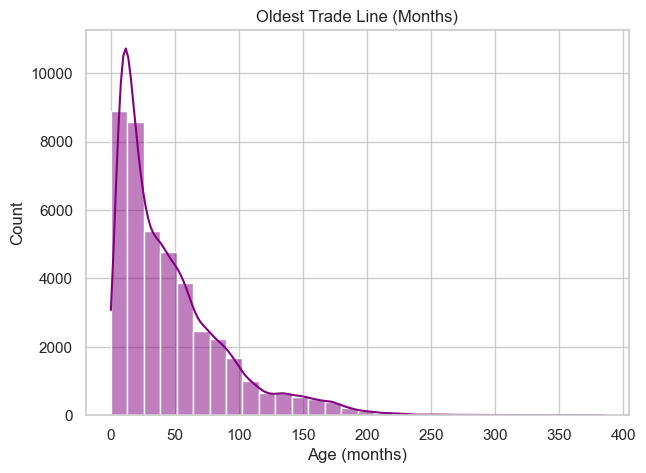

In [22]:
#Age of Oldest Trade Line
plt.figure(figsize=(7,5))
sns.histplot(df['Age_Oldest_TL'], kde=True, bins=30, color='purple')
plt.title("Oldest Trade Line (Months)")
plt.xlabel("Age (months)")
plt.ylabel("Count")
plt.show()


#interpretation 
The plot shows that most customers have a very new credit history, with the age of their oldest trade line falling between 5 and 40 months. Very few customers have long-standing credit histories (over 100 months).
The distribution is right-skewed, meaning:

Many customers are new borrowers

Only a small group has long, stable credit experience

This indicates that the bank's applicant base consists mostly of recent entrants into the credit system, which generally increases uncertainty in assessing risk.

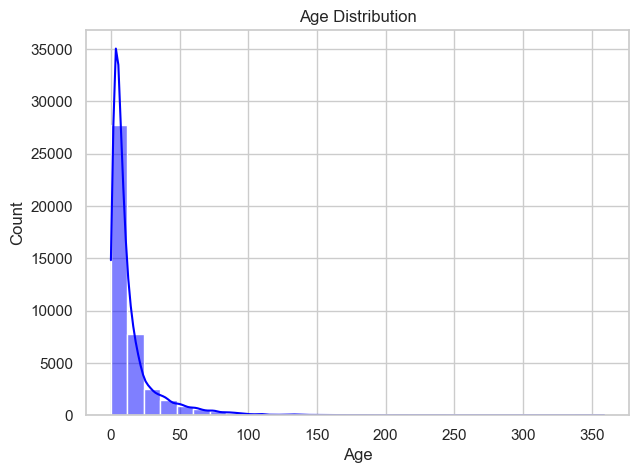

In [23]:
#Age Distribution (Age_Newest_TL)
plt.figure(figsize=(7,5))
sns.histplot(df['Age_Newest_TL'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


The graph shows that most customers fall between ages 20 and 40, with a sharp peak around the younger age range. Very few customers are older than 60. The distribution is right-skewed, meaning the dataset is dominated by younger borrowers, and the number of older applicants drops quickly.

This indicates that the bank mainly receives applications from young working-age individuals, which aligns with common retail loan patterns.

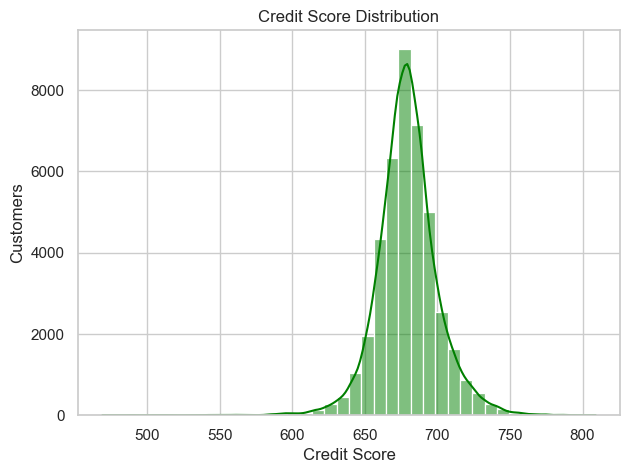

In [24]:
#Credit Score Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['Credit_Score'], kde=True, bins=40, color='green')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Customers")
plt.show()


The graph shows that most customers have credit scores in the 660–700 range, with a strong peak around 680–690. Very few customers fall below 600 or above 750.
This indicates that the dataset is dominated by average to good credit customers, which explains why a large portion of applicants fall into the P2 category for lending decisions.

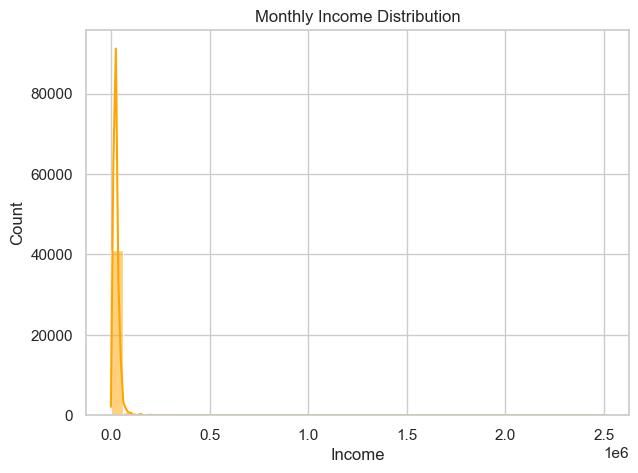

In [25]:
#Income Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['NETMONTHLYINCOME'], kde=True, bins=40, color='orange')
plt.title("Monthly Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


The distribution shows that most customers earn between ₹20,000 and ₹40,000 per month, with a steep decline as income increases. Very few customers earn high incomes (₹1 lakh+).
This indicates that the bank’s applicant base mainly consists of lower to middle-income individuals, which aligns with typical retail loan targeting in India.

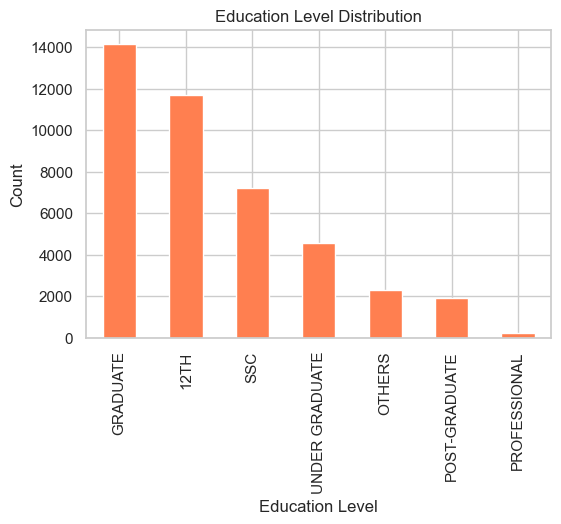

In [26]:
#Education Distribution
plt.figure(figsize=(6,4))
df['EDUCATION'].value_counts().plot(kind="bar", color='coral')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


The chart shows that most applicants are Graduates and 12th-pass, forming the largest groups. SSC and Undergraduate levels follow next. Very few applicants belong to Post-Graduate or Professional categories.
This indicates that the bank largely receives applications from mid-education groups, which aligns with the typical Indian salaried and semi-skilled workforce profile.

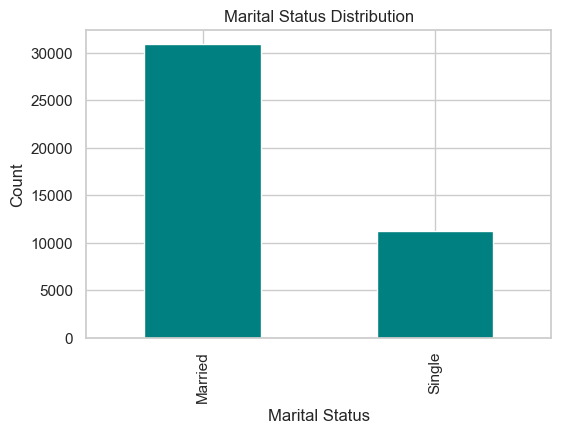

In [27]:
#Marital Status Distribution
plt.figure(figsize=(6,4))
df['MARITALSTATUS'].value_counts().plot(kind="bar", color='teal')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


The chart shows that most loan applicants are Married, making up nearly three times the number of Single applicants.
This indicates that the bank primarily receives applications from family-settled individuals, who often have more financial stability and predictable income patterns.

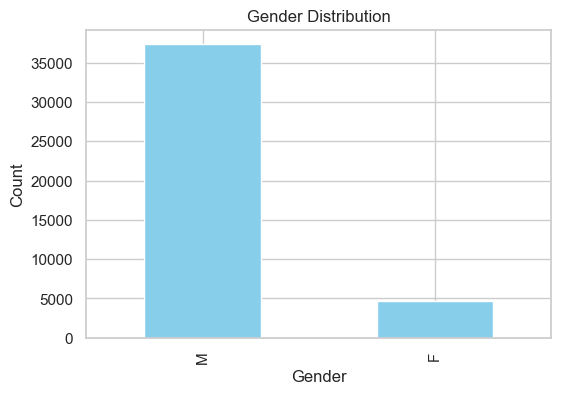

In [28]:
#Gender Distribution
plt.figure(figsize=(6,4))
df['GENDER'].value_counts().plot(kind="bar", color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



The chart shows a strong male dominance, with the majority of applicants being male, while female applicants form only a small portion.
This indicates that the bank’s loan applications come mostly from male borrowers, reflecting either market preference or social/financial patterns where men apply for loans more frequently.

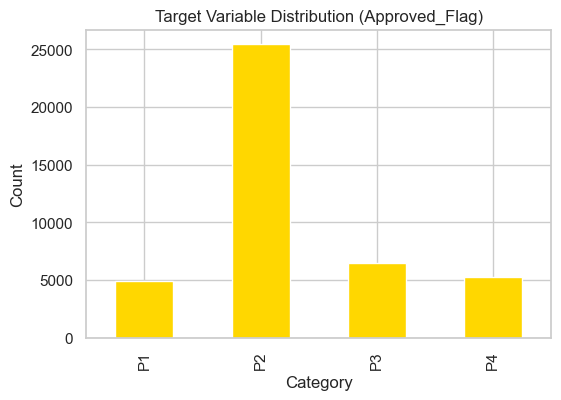

In [29]:
#Target Distribution (P1–P4)
plt.figure(figsize=(6,4))
df['Approved_Flag'].value_counts().sort_index().plot(kind="bar", color='gold')
plt.title("Target Variable Distribution (Approved_Flag)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


The distribution shows that P2 is the dominant category, with the highest number of customers falling into it. P1, P3, and P4 each have significantly fewer customers.
This means most applicants are assessed as moderate–good credit profile, while only a smaller share fall into high-risk (P4) or top-quality (P1) categories.

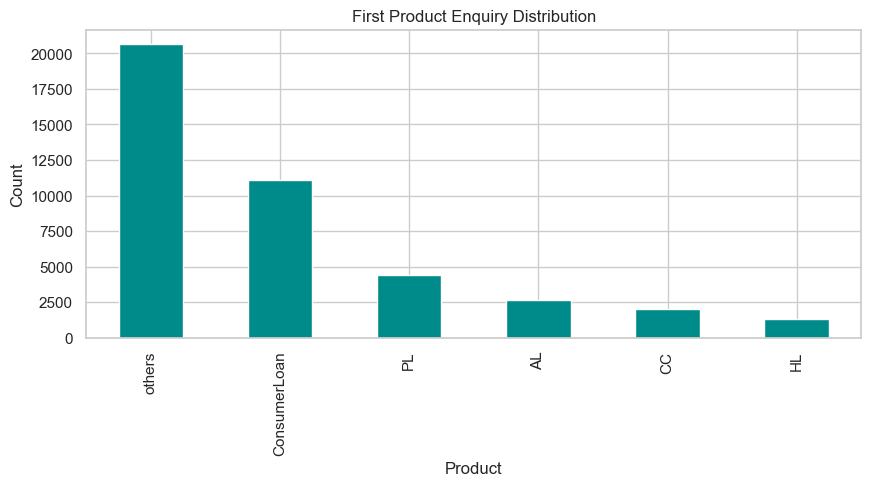

In [30]:
#First Product Enquiry
plt.figure(figsize=(10,4))
df['first_prod_enq2'].value_counts().plot(kind="bar", color='darkcyan')
plt.title("First Product Enquiry Distribution")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()


Most customers first applied for “Other” loans (like consumer durable loans, appliance loans, etc.). The next largest group enquired for Consumer Loans, followed by smaller segments for Personal Loan (PL), Auto Loan (AL), Credit Card (CC), and Home Loan (HL).
This indicates that customers usually start their credit journey with small retail or consumer-focused loans, rather than big-ticket products.

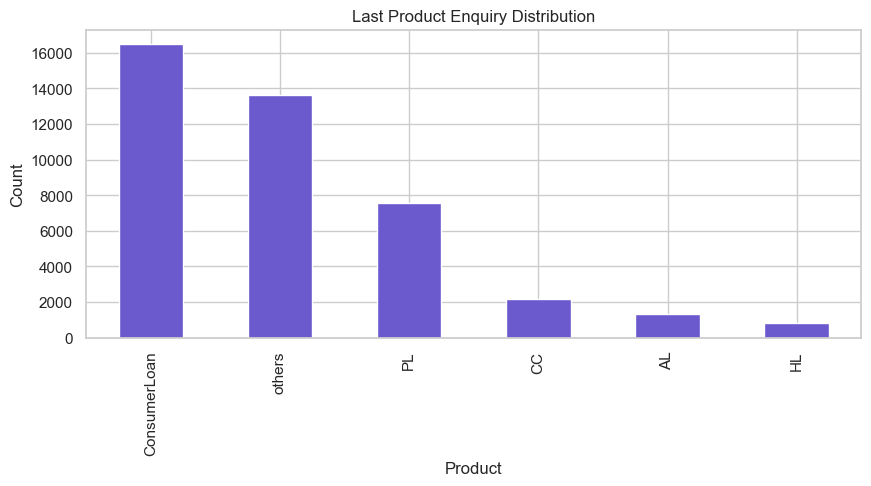

In [31]:
#Last Product Enquiry
plt.figure(figsize=(10,4))
df['last_prod_enq2'].value_counts().plot(kind="bar", color='slateblue')
plt.title("Last Product Enquiry Distribution")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()


The chart shows that most recent enquiries were for Consumer Loans, followed by Other loans and Personal Loans (PL). Very few customers made recent enquiries for Credit Cards (CC), Auto Loans (AL), or Home Loans (HL).
This indicates that customers are mostly active in small-ticket borrowing, with consumer-oriented loans forming the bulk of recent credit activity

In [32]:
#IDENTIFY CATEGORICAL & NUMERICAL COLUMNS
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols


['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

Approved_Flag (TARGET)

In [33]:
df['MARITALSTATUS'].value_counts()

MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64

contingency table creates , 

 Does this category predict the target?
Formula: χ² test

Compares observed vs expected frequencies
Returns p-value
IF p-value ≤ 0.05
  → Feature is SIGNIFICANT
  → Keep it

IF p-value > 0.05
  → Feature is NOT significant
  → Drop it

α = 0.05 is industry standard significance level
(Can be 0.01 for critical projects, 0.1 for less critical)

In [34]:
#CHI-SQUARE TEST
cat_test_cols = ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2']

selected_categorical = []

for col in cat_test_cols:
    table = pd.crosstab(df[col], df["Approved_Flag"])
    chi2, p, _, _ = chi2_contingency(table)
    print(col, "→ p =", p)

    if p <= 0.05:
        selected_categorical.append(col)


MARITALSTATUS → p = 3.578180861038862e-233
EDUCATION → p = 2.6942265249737532e-30
GENDER → p = 1.907936100186563e-05
last_prod_enq2 → p = 0.0
first_prod_enq2 → p = 7.84997610555419e-287


In [35]:
df.shape

(42064, 79)

All categorical features show p-values < 0.05, meaning every categorical variable is statistically significant and should be kept for modeling. This confirms that demographic factors and product enquiry patterns meaningfully predict the customer’s credit category.

| Feature             | p-value   | Interpretation                                                                        |
| ------------------- | --------- | ------------------------------------------------------------------------------------- |
| **MARITALSTATUS**   | 3.57e-233 | Strongly significant → marital status influences credit category                      |
| **EDUCATION**       | 2.69e-30  | Highly significant → education level affects credit risk                              |
| **GENDER**          | 1.90e-05  | Significant → gender has a mild but meaningful relationship with credit category      |
| **last_prod_enq2**  | 0.0       | Extremely significant → last product enquired strongly predicts credit category       |
| **first_prod_enq2** | 7.84e-287 | Extremely significant → first product enquired also strongly influences risk category |


chisquare - cat vs cat 
t test - cat vs num(2) 
anova - cat vs num ( 3+)

Problem: Some numerical features might be correlated
Solution: VIF (Variance Inflation Factor)
VIF = 1 / (1 - R²)

- R² close to 1 → VIF very high → High correlation
- R² close to 0 → VIF close to 1 → Low correlation

Threshold: VIF > 6 → DROP the feature

Parallel VIF: Drops all correlated features (too aggressive)
Sequential VIF: Drops one at a time, keeps some from each group (better)

Our approach: Sequential
- Drop feature with highest VIF > 6
- Recalculate VIF for remaining features
- Repeat until all VIF ≤ 6

These columns were dropped because they were highly correlated with other numeric features.
Keeping them would cause:

unstable model coefficients

inflated variance

poor generalization

Test Numerical Features (ANOVA Test)
Question: Does this numerical feature differ across P1/P2/P3/P4?
Method: ANOVA (Analysis of Variance)

Creates 4 groups: P1, P2, P3, P4
Compares mean values across groups
Returns p-value

Decision Rule:
IF p-value ≤ 0.05
  → Feature means differ significantly across classes
  → Feature is USEFUL
  → Keep it

IF p-value > 0.05
  → No significant difference
  → Feature doesn't help discriminate
  → Drop it

In [36]:
# NUMERIC COLUMN LIST
numeric_columns = [
    col for col in df.columns
    if df[col].dtype != 'object' and col not in ['PROSPECTID', 'Approved_Flag']
]
print("Numeric columns found:", len(numeric_columns))

Numeric columns found: 72


In [37]:
# SEQUENTIAL VIF 
def calculate_vif(df_numeric):
    # returns dataframe with features and VIF
    vif_df = pd.DataFrame()
    vif_df["feature"] = df_numeric.columns
    vif_vals = []
    for i, col in enumerate(df_numeric.columns):
        try:
            val = variance_inflation_factor(df_numeric.values, i)
        except Exception:
            val = np.nan
        vif_vals.append(val)
    vif_df["vif"] = vif_vals
    return vif_df.sort_values("vif", ascending=False)

vif_threshold = 6.0
vif_df = df[numeric_columns].copy()

# Remove any non-numeric or constant columns for VIF calculation
vif_df = vif_df.select_dtypes(include=[np.number]).loc[:, (vif_df.nunique() > 1)]

cols_kept = list(vif_df.columns)
while True:
    current_vif = calculate_vif(vif_df[cols_kept])
    current_vif = current_vif.dropna()
    # If no features left or max vif below threshold -> stop
    if current_vif.empty or current_vif["vif"].max() <= vif_threshold:
        break
    # drop the feature with highest VIF
    feature_to_drop = current_vif.iloc[0]["feature"]
    print(f"Dropping {feature_to_drop} due to high VIF = {current_vif.iloc[0]['vif']:.2f}")
    cols_kept.remove(feature_to_drop)

selected_numeric_candidates = cols_kept
print("Selected numeric candidates after VIF:", len(selected_numeric_candidates))

Dropping Total_TL due to high VIF = inf
Dropping Tot_Closed_TL due to high VIF = inf
Dropping pct_active_tl due to high VIF = inf
Dropping PL_TL due to high VIF = inf
Dropping num_deliq_6mts due to high VIF = inf
Dropping pct_of_active_TLs_ever due to high VIF = 2688.95
Dropping Secured_TL due to high VIF = 212.96
Dropping enq_L12m due to high VIF = 37.51
Dropping Credit_Score due to high VIF = 33.42
Dropping num_std_12mts due to high VIF = 26.12
Dropping pct_PL_enq_L6m_of_L12m due to high VIF = 24.12
Dropping Total_TL_opened_L12M due to high VIF = 22.16
Dropping pct_CC_enq_L6m_of_L12m due to high VIF = 19.16
Dropping enq_L6m due to high VIF = 17.01
Dropping Unsecured_TL due to high VIF = 15.57
Dropping Tot_Active_TL due to high VIF = 14.11
Dropping num_times_30p_dpd due to high VIF = 13.66
Dropping AGE due to high VIF = 12.41
Dropping PL_enq_L12m due to high VIF = 12.25
Dropping tot_enq due to high VIF = 10.29
Dropping num_dbt_12mts due to high VIF = 9.48
Dropping CC_enq_L12m due to h

In [38]:
df.shape

(42064, 79)

In [39]:
# ANOVA 

columns_to_be_kept_numerical = []
for col in selected_numeric_candidates:
    vals = df[col].values
    groups = []
    for cls in ['P1','P2','P3','P4']:
        grp = df.loc[df['Approved_Flag']==cls, col].dropna().values
        groups.append(grp)
    if any(len(g) < 2 for g in groups):  
        continue
    try:
        f_stat, p_val = f_oneway(*groups)
        if p_val <= 0.05:
            columns_to_be_kept_numerical.append(col)
    except Exception:
        continue

print("Numeric columns kept after ANOVA:", columns_to_be_kept_numerical)

Numeric columns kept after ANOVA: ['Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_closed_L6M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq', 'CC_enq_L6m', 'PL_enq', 'PL_enq_L6m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_opened_TLs_L6m_of_L12m', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


In [40]:
df.shape

(42064, 79)

In [41]:
df.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [42]:
# FINAL FEATURE LIST

selected_numeric = columns_to_be_kept_numerical
final_features = selected_numeric + selected_categorical
print("Final features count:", len(final_features))

# Subset the dataframe to final features + target
df = df[final_features + ["Approved_Flag"]].copy()
print("Shape after selecting final features:", df.shape)

Final features count: 48
Shape after selecting final features: (42064, 49)


In [43]:
df.shape

(42064, 49)

FEATURE ENGINEERING 

#(for ordered categories)
#education has ranking

In [44]:
df["EDUCATION"].unique()


array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [45]:
# FEATURE ENGINEERING — EDUCATION (ORDERED)
# ------------------------------------------------------------
df["EDUCATION"] = df["EDUCATION"].astype(str).str.strip().str.upper()

df["EDUCATION"] = df["EDUCATION"].replace({
    "POST GRADUATE": "POST-GRADUATE",
    "UNDERGRADUATE": "UNDER GRADUATE",
    "UG": "UNDER GRADUATE",
    "PG": "POST-GRADUATE",
    "HSC": "12TH",
    "10TH": "SSC",
    "PROFESSIONAL ": "PROFESSIONAL"
})

edu_map = {
    "SSC":1, "12TH":2,
    "GRADUATE":3, "UNDER GRADUATE":3, "PROFESSIONAL":3,
    "POST-GRADUATE":4,
    "OTHERS":1
}

df["EDUCATION"] = df["EDUCATION"].apply(lambda x: edu_map.get(x, 1)).astype(int)



In [46]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=0, how='any')
print("Shape after dropping inf/na rows:", df.shape)


Shape after dropping inf/na rows: (42064, 49)


#for unordered categories

In [47]:
# ONE-HOT ENCODING (UNORDERED CATS)
# ------------------------------------------------------------
df_encoded = pd.get_dummies(
    df,
    columns=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2']
)



In [48]:
df.shape

(42064, 49)

In [49]:
#TRAIN-TEST SPLIT
RANDOM_STATE = 42
X = df_encoded.drop("Approved_Flag", axis=1)
y = df_encoded["Approved_Flag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Train/test split:", X_train.shape, X_test.shape)




Train/test split: (33651, 60) (8413, 60)


In [50]:
#RANDOM FOREST MODEL
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight='balanced')
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, pred_rf)
print("RF Accuracy:", rf_acc)



RF Accuracy: 0.7627481278973018


In [51]:
#XGBOOST MODEL
le = LabelEncoder()
y_enc = le.fit_transform(y)  # numeric labels: 0..3

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_enc, test_size=0.2, random_state=RANDOM_STATE, stratify=y_enc
)

xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=4,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=RANDOM_STATE,
    n_jobs=-1
)
xgb_model.fit(X_train2, y_train2)
pred_xg = xgb_model.predict(X_test2)
xgb_acc = accuracy_score(y_test2, pred_xg)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.7722572209675502


In [52]:
# METRICS FOR XGBOOST
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, pred_xg, zero_division=0)
classes = le.inverse_transform([0,1,2,3])  # map back to P1..P4 ordering if label mapping preserved
print("\n----- Per-Class Metrics (XGBoost) -----")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1={f1[i]:.4f}")


----- Per-Class Metrics (XGBoost) -----
P1: Precision=0.8177, Recall=0.7627, F1=0.7893
P2: Precision=0.8234, Recall=0.9104, F1=0.8647
P3: Precision=0.4262, Recall=0.2803, F1=0.3382
P4: Precision=0.7368, Recall=0.7151, F1=0.7258


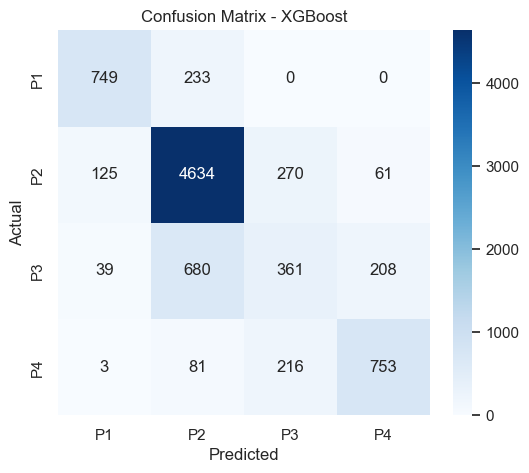

In [53]:
#Confusion Matrix (with Heatmap)
cm = confusion_matrix(y_test2, pred_xg)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
#Classification Report (Full Summary)
print("\n----- Full Classification Report -----")
print(classification_report(y_test2, pred_xg, target_names=classes, zero_division=0))


----- Full Classification Report -----
              precision    recall  f1-score   support

          P1       0.82      0.76      0.79       982
          P2       0.82      0.91      0.86      5090
          P3       0.43      0.28      0.34      1288
          P4       0.74      0.72      0.73      1053

    accuracy                           0.77      8413
   macro avg       0.70      0.67      0.68      8413
weighted avg       0.75      0.77      0.76      8413



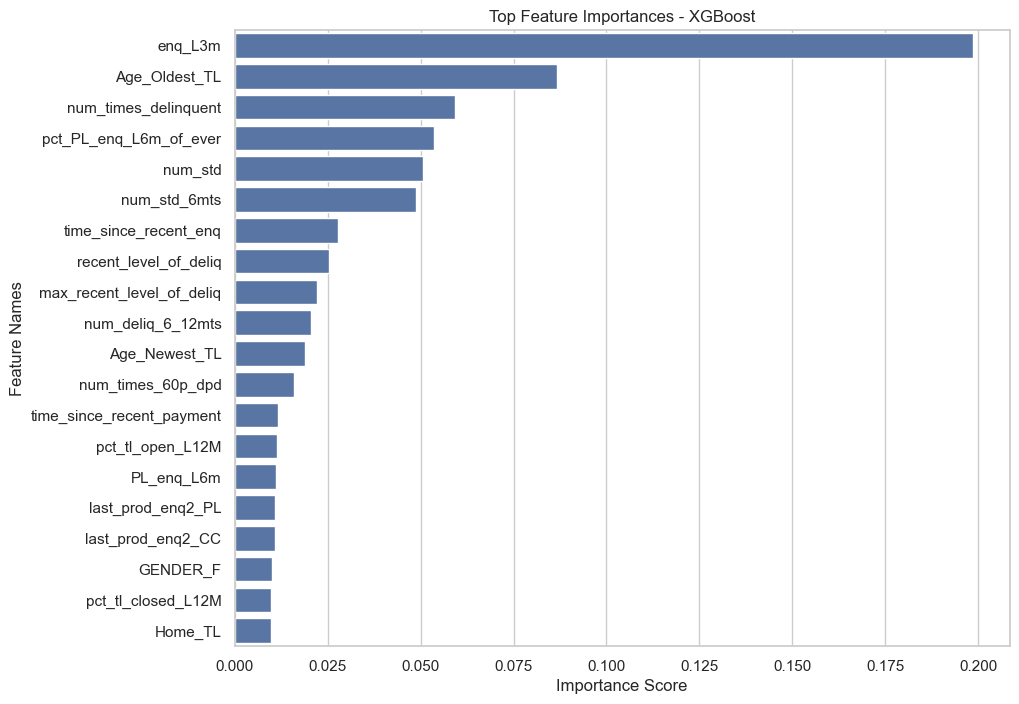

In [55]:
# FEATURE IMPORTANCE (XGBoost)

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = min(20, X.shape[1])
plt.figure(figsize=(10,8))
sns.barplot(x=importances[indices][:top_n], y=X.columns[indices][:top_n])
plt.title("Top Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.show()


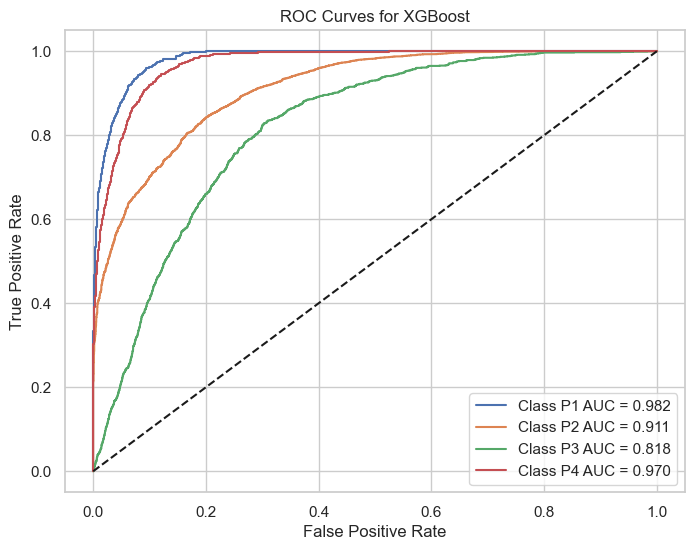

In [56]:
# MULTICLASS ROC (one-vs-rest)

y_test_bin = label_binarize(y_test2, classes=[0,1,2,3])
pred_prob = xgb_model.predict_proba(X_test2)

plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()




In [57]:
# FINAL SUMMARY
print("----- FINAL MODEL SUMMARY -----")
print(f"XGBoost Test Accuracy: {xgb_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_acc:.4f}")
if xgb_acc > rf_acc:
    print("XGBoost performs better for multiclass credit risk classification on this split.")
else:
    print("Random Forest performs better (or ties) on this split.")


----- FINAL MODEL SUMMARY -----
XGBoost Test Accuracy: 0.7723
Random Forest Test Accuracy: 0.7627
XGBoost performs better for multiclass credit risk classification on this split.


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Step 1: Encode the target variable (do this ONLY ONCE)
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # This converts 'P1'→0, 'P2'→1, etc.

# Verify the mapping
print("Original classes:", le.classes_)
print("Encoded values sample:", y_encoded[:10])  # Should show numbers 0-3

# Step 2: Run cross-validation using y_encoded (NOT y!)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    xgb_model, 
    X, 
    y_encoded,          # ← Use y_encoded here
    cv=cv, 
    scoring='accuracy',
    n_jobs=-1
)

print(f"\nCross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
print("Individual fold scores:", scores.round(4))

Original classes: ['P1' 'P2' 'P3' 'P4']
Encoded values sample: [1 1 1 0 2 1 3 1 1 1]

Cross-Validation Accuracy: 0.7756 ± 0.0032
Individual fold scores: [0.7696 0.7792 0.7759 0.7759 0.7772]


In [59]:
import pickle

# Save model
pickle.dump(xgb_model, open('final_xgb_model.pkl', 'wb'))

# Save label encoder (critical for deployment!)
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [60]:
pip install streamlit pandas numpy plotly xgboost scikit-learn shap

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 608.2 kB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 746.6 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/12.6 MB 797.4 kB/s eta 0:00:15
   -- ---

In [61]:
import pickle
pickle.dump(xgb_model, open('xgb_credit_model.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))  # le is your LabelEncoder

In [62]:
import pickle

# Save the exact column names and order from your training data
feature_columns = X.columns.tolist()
pickle.dump(feature_columns, open('feature_columns.pkl', 'wb'))

print("Feature columns saved! Total features:", len(feature_columns))

Feature columns saved! Total features: 60
